In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


6
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
(84, 84, 4)


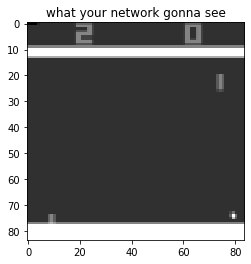

In [3]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name = "PongNoFrameskip-v4"
#env_name = "BreakoutNoFrameskip-v4"
#env_name = "SpaceInvadersNoFrameskip-v4"
env = make_atari_deepmind(env_name, skip=4)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
print(env.unwrapped.get_action_meanings())

obs = env.reset()
obs, r, done, _ = env.step(2)

done = False
for _ in range(130):
    obs, _, done, _ = env.step(1)
    #env.render()
    obs = np.array(obs)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
print (obs.shape)
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [4]:

from dqnagent import DQNAgent
import tr_helpers
import models


#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 2,
    'EPSILON' : 0,
    'MIN_EPSILON' : 0,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'ENDDDQN2',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 420,
    'NUM_STEPS_FILL_BUFFER' : 100000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'STEPS_NUM' : 3,
    'NETWORK' : models.AtariNoisyDuelingDQN(),
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 20, 
    'LIVES_REWARD' : 5,
    'ATOMS_NUM' : 1
    }

spaceinviders_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 2,
    'EPSILON' : 0,
    'MIN_EPSILON' : 0,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'ENDDDQN2',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 5000,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'STEPS_NUM' : 1,
    'NETWORK' : models.AtariNoisyDuelingDQN(),
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),#tr_helpers.DefaultRewardsShaper(clip_value=3, scale_value = 0.05),
    'EPISODES_TO_LOG' : 15, 
    'LIVES_REWARD' : 3,
    'ATOMS_NUM' : 1
    }

pong_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : .90,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'PongDDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 20,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : models.AtariDuelingDQN(),
    'STEPS_NUM' : 1,
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 10, 
    'LIVES_REWARD' : 1,
    'ATOMS_NUM' : 1
    }

pong_dddqn_config7 = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : 0,
    'MIN_EPSILON' : 0,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'pong_dddqn_config6',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 18,
    'NUM_STEPS_FILL_BUFFER' : 1000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 1000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : models.AtariNoisyDuelingDQN(),
    'STEPS_NUM' : 3,
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 10, 
    'LIVES_REWARD' : 1,
    'ATOMS_NUM' : 1
    }
pong_dddqn_config0 = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : .90,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'pong_dddqn_config0',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 18,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'prioritized',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : models.AtariDQN(),
    'STEPS_NUM' : 1,
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 10, 
    'LIVES_REWARD' : 1,
    'ATOMS_NUM' : 1
    }

pong_dddqn_config1 = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : .90,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'pong_dddqn_config1',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 18,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : models.AtariDQN(),
    'STEPS_NUM' : 1,
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 10, 
    'LIVES_REWARD' : 1,
    'ATOMS_NUM' : 1
    }
pong_dddqn_config3 = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : .90,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'pong_dddqn_config3',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 18,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'NETWORK' : models.AtariDuelingDQN(),
    'STEPS_NUM' : 1,
    'REWARD_SHAPER' : tr_helpers.DefaultRewardsShaper(),
    'EPISODES_TO_LOG' : 10, 
    'LIVES_REWARD' : 1,
    'ATOMS_NUM' : 1
    }
agent = DQNAgent(env, sess, env_name, config = pong_dddqn_config7)
#agent.restore('nn/pong_dddqn_config0PongNoFrameskip-v4')
#agent.epsilon = 0.02

W0725 16:35:38.650569 139620787283776 deprecation_wrapper.py:119] From /home/trrrrr/Documents/github/ml/dqn_atari/dqnagent.py:80: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 16:35:38.656374 139620787283776 deprecation_wrapper.py:119] From /home/trrrrr/Documents/github/ml/dqn_atari/networks.py:297: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0725 16:35:38.656860 139620787283776 deprecation.py:323] From /home/trrrrr/Documents/github/ml/dqn_atari/networks.py:181: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0725 16:35:38.659631 139620787283776 deprecation.py:506] From /home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will 

W0725 16:35:39.025816 139620787283776 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0725 16:35:39.026374 139620787283776 deprecation.py:323] From /home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
W0725 16:35:39.248499 139620787283776 deprecation_wrapper.py:119] From /home/trrrrr/Documents/github/ml/dqn_atari/networks.py:7: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0725 16:35:39.256273 139620787

In [5]:
env.reset()
agent.train()

Frames per seconds:  161.89008452257698
Frames per seconds:  168.86622400135792
Frames per seconds:  168.38457469817726
Frames per seconds:  169.266136776416
Frames per seconds:  169.16402126730483
Frames per seconds:  170.0712856826292
Frames per seconds:  170.3858932330667
saving next best rewards:  -19.9
Frames per seconds:  168.58282083891166
Frames per seconds:  167.36521482745135
Frames per seconds:  168.73586451773744
Frames per seconds:  168.46571312505026
Frames per seconds:  168.0724516879819
Frames per seconds:  169.52577530595082
Frames per seconds:  170.32312348506045
Frames per seconds:  168.35872854459853
saving next best rewards:  -19.8
Frames per seconds:  168.22108825380116
Frames per seconds:  168.6844595361988
Frames per seconds:  168.19639841178608
Frames per seconds:  168.66124086509626
Frames per seconds:  168.727400051749
Frames per seconds:  169.01272693673377
Frames per seconds:  169.02235753060518
Frames per seconds:  166.5496985367164
Frames per seconds:  16

Frames per seconds:  164.06096961845486
Frames per seconds:  162.71183495000173
Frames per seconds:  151.81759985011905
Frames per seconds:  163.7658319899964
Frames per seconds:  165.52083171780689
Frames per seconds:  166.97175750435682
Frames per seconds:  166.82478871684324
Frames per seconds:  170.39257285227177
Frames per seconds:  166.56910464753688
Frames per seconds:  166.0274834341796
Frames per seconds:  166.35250110149977
Frames per seconds:  166.12403020639988
Frames per seconds:  166.65835554455882
Frames per seconds:  166.20399209379661
Frames per seconds:  169.98287568943647
Frames per seconds:  167.18450645979382
Frames per seconds:  166.69799810771343
Frames per seconds:  170.52624063891398
Frames per seconds:  166.73995298623962
Frames per seconds:  169.5586845592958
Frames per seconds:  165.98211591201988
Frames per seconds:  166.3537678876336
Frames per seconds:  166.38483657722563
Frames per seconds:  165.383140990462
Frames per seconds:  165.06646966121875
Frames

KeyboardInterrupt: 

In [ ]:
#agent.save("./nn/ENDDDQN2" + env_name)


In [8]:
import wrappers
#print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    env._max_episode_steps = 9999
    print('reset')
    #env = env.old_env
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #nv.render()
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        
            
        if done:
            break       
        
    return reward

import gym.wrappers

env_monitor = wrappers.make_atari_deepmind(env_name, noop_max=30, skip=4)
#env_monitor = wrappers.ReallyDoneWrapper(env_monitor)
env_monitor = gym.wrappers.Monitor(env_monitor,directory='video_dddqn05',force=True)

sessions = [print('reward:', evaluate(env_monitor)) for _ in range(1)]
env_monitor.close()

/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


reset
reward: 16.0


In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()